In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
# import statsmodels.tsa.arima.model.ARIMA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from statsmodels.tools.eval_measures import rmse
from util import *
import matplotlib.pyplot as plt

### Getting input data (country and state: GA)

In [2]:
data_path = "../../data/"
overall = pd.read_csv(data_path + "superCOVID-19dataframe.csv", index_col = "countyFIPS").drop(0)
county_names = overall['County Name']
overall.drop(columns = ['County Name'], inplace=True)
overall = drop_zeros(overall)
ga = per_N(get_state(overall, 'GA'), 1000000)

c:\users\jamis\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:4162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [3]:
cases, deaths = get_known_dfs(overall)
cases.head()

,day,total
0,0,0.0
1,1,0.0
2,2,1.0
3,3,0.0
4,4,3.0


### Regression Models

In [4]:
poly_1c = smf.ols(formula=" total ~ day", data=cases).fit()

In [5]:
days = cases['day']
pred = poly_1c.predict(days)
pred.head()

0   -4469.853877
1   -4202.935078
2   -3936.016279
3   -3669.097481
4   -3402.178682
dtype: float64

In [6]:
# tmp = pd.DataFrame({'day': [days.min(), days.max()]})
# line =  poly_1c.predict(tmp) 

In [7]:
# cases.plot(kind="scatter", x='day', y='total')
# plt.plot(tmp, line, c="red", linewidth = 2)

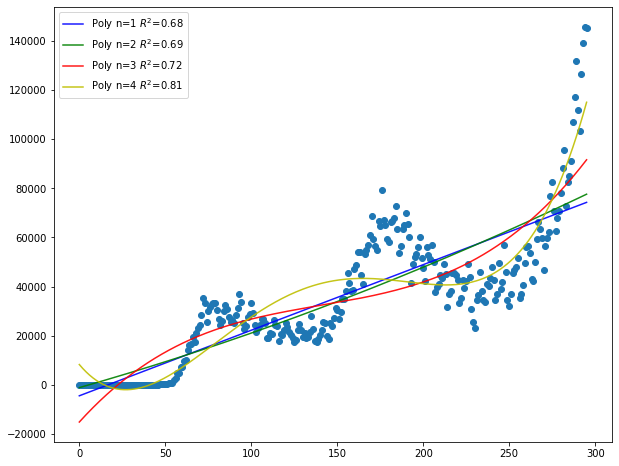

In [8]:
plt.figure(figsize=(10, 8))

plt.scatter(cases.day, cases.total)

plt.plot(cases.day, poly_1c.predict(days), 'b-', label='Poly n=1 $R^2$=%.2f' % poly_1c.rsquared, alpha=0.9)

# 2-nd order polynomial
poly_2c = smf.ols(formula='total ~ 1 + day + I(day ** 2.0)', data=cases).fit()
poly_3c = smf.ols(formula='total ~ 1 + day + I(day ** 2.0) + I(day ** 3.0)', data=cases).fit()
poly_4c = smf.ols(formula='total ~ 1 + day + I(day ** 2.0) + I(day ** 3.0) + I(day ** 4.0)', data=cases).fit()
# poly_5c = smf.ols(formula='total ~ 1 + day + I(day ** 2.0) + I(day ** 3.0) + I(day ** 5.0) + I(day ** 6.0)', data=cases).fit()


plt.plot(cases.day, poly_2c.predict(days), 'g-', label='Poly n=2 $R^2$=%.2f' % poly_2c.rsquared, alpha=0.9)
plt.plot(cases.day, poly_3c.predict(days), 'r-', alpha=0.9, label='Poly n=3 $R^2$=%.2f' % poly_3c.rsquared)
plt.plot(cases.day, poly_4c.predict(days), 'y-', alpha=0.9, label='Poly n=4 $R^2$=%.2f' % poly_4c.rsquared)
# plt.plot(cases.day, poly_5c.predict(days), 'm-', alpha=0.9, label='Poly n=5 $R^2$=%.2f' % poly_5c.rsquared)

legend = plt.legend()

In [9]:
train, test = train_test_split(cases)

In [10]:
poly_3ct = smf.ols(formula='total ~ 1 + day + I(day ** 2.0) + I(day ** 3.0)', data=train).fit()

In [11]:
test_preds1c = poly_1c.predict(test['day'])
test_preds2c = poly_2c.predict(test['day'])
test_preds3c = poly_3c.predict(test['day'])
test_preds4c = poly_4c.predict(test['day'])

In [12]:
rmse1 = rmse(test_preds1c, test['total'])
rmse2 = rmse(test_preds2c, test['total'])
rmse3 = rmse(test_preds3c, test['total'])
rmse4 = rmse(test_preds4c, test['total'])
print(rmse1, rmse2, rmse3, rmse4)

16335.221722604738 16296.781619073625 15112.879994424104 12299.110520236423


### 3rd order polynomial seems to be the best fit

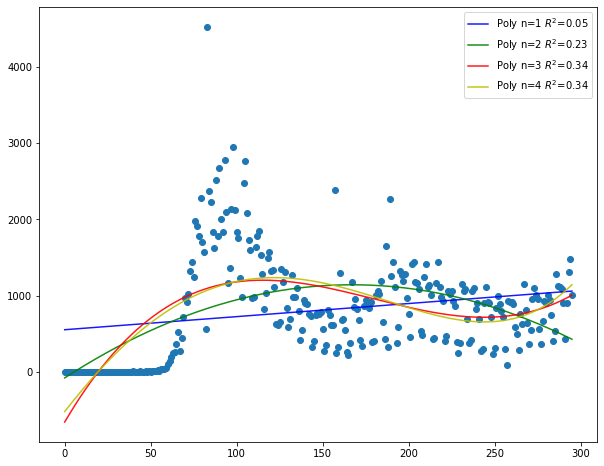

In [13]:
plt.figure(figsize=(10, 8))

plt.scatter(deaths.day, deaths.total)

poly_1d = smf.ols(formula=" total ~ day", data=deaths).fit()
poly_2d = smf.ols(formula='total ~ 1 + day + I(day ** 2.0)', data=deaths).fit()
poly_3d = smf.ols(formula='total ~ 1 + day + I(day ** 2.0) + I(day ** 3.0)', data=deaths).fit()
poly_4d = smf.ols(formula='total ~ 1 + day + I(day ** 2.0) + I(day ** 3.0) + I(day ** 4.0)', data=deaths).fit()
# poly_5d = smf.ols(formula='total ~ 1 + day + I(day ** 2.0) + I(day ** 3.0) + I(day ** 5.0) + I(day ** 6.0)', data=deaths).fit()

plt.plot(deaths.day, poly_1d.predict(days), 'b-', label='Poly n=1 $R^2$=%.2f' % poly_1d.rsquared, alpha=0.9)
plt.plot(deaths.day, poly_2d.predict(days), 'g-', label='Poly n=2 $R^2$=%.2f' % poly_2d.rsquared, alpha=0.9)
plt.plot(deaths.day, poly_3d.predict(days), 'r-', alpha=0.9, label='Poly n=3 $R^2$=%.2f' % poly_3d.rsquared)
plt.plot(deaths.day, poly_4d.predict(days), 'y-', alpha=0.9, label='Poly n=4 $R^2$=%.2f' % poly_4d.rsquared)
# plt.plot(deaths.day, poly_5d.predict(days), 'm-', alpha=0.9, label='Poly n=5 $R^2$=%.2f' % poly_5d.rsquared)

legend = plt.legend()

In [14]:
train, test = train_test_split(deaths)
poly_3dt = smf.ols(formula='total ~ 1 + day + I(day ** 2.0) + I(day ** 3.0)', data=train).fit()

test_preds1d = poly_1c.predict(test['day'])
test_preds2d = poly_2c.predict(test['day'])
test_preds3d = poly_3c.predict(test['day'])
test_preds4d = poly_4c.predict(test['day'])


rmse1 = rmse(test_preds1d, test['total'])
rmse2 = rmse(test_preds2d, test['total'])
rmse3 = rmse(test_preds3d, test['total'])
rmse4 = rmse(test_preds4d, test['total'])

print(rmse1, rmse2, rmse3, rmse4)

38764.27513096025 38552.862427356406 38224.33681927204 38988.51484683762


### Use linear and polynomial regression models to compare trends for a single state and its counties


###  Identify which counties are most at risk. Model for top 5 counties with cases within a state and observe their trends. 

c:\users\jamis\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:4162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


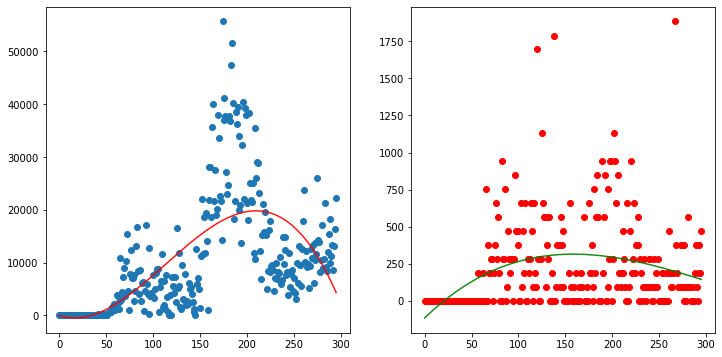

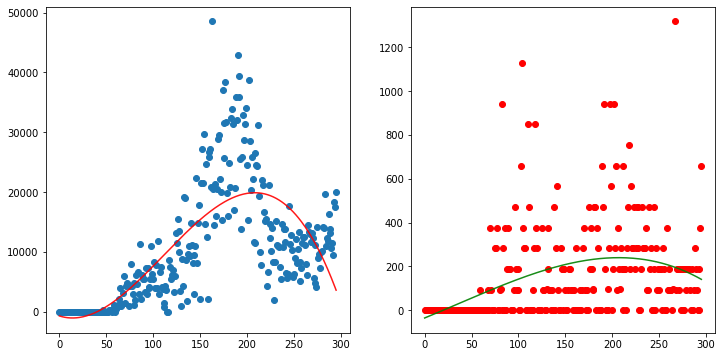

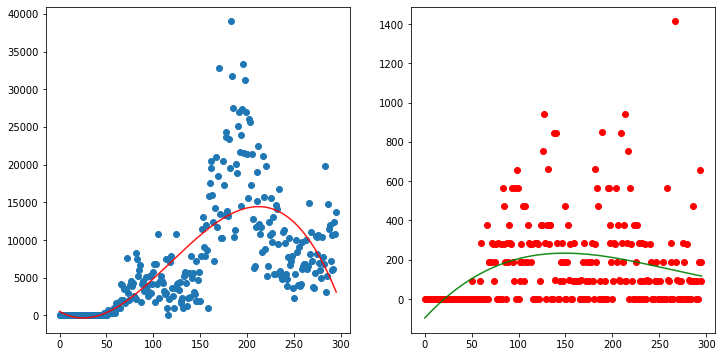

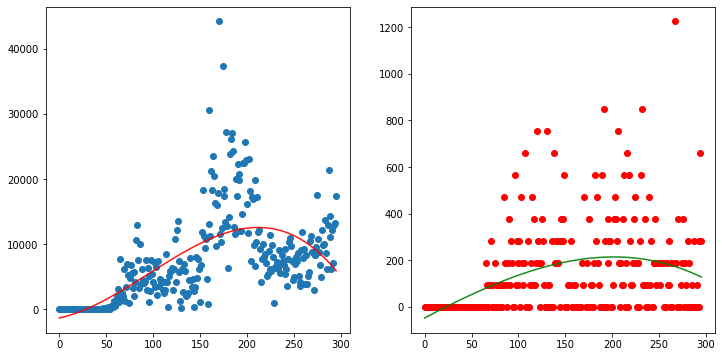

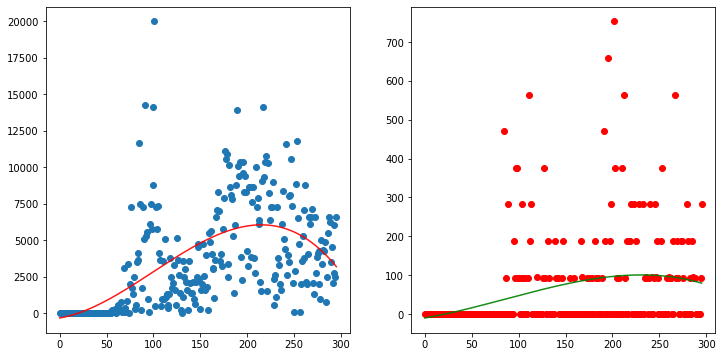

In [15]:
n_ga = per_N(get_state(overall, 'GA'), 1000000000)
top5 = [13121, 13135, 13067, 13089, 13139]

for county in top5:
    c,d = get_known_dfs(n_ga.loc[[county]])
    errs = d.loc[d['total'] < 0].index
#     print(errs)
    d.drop(errs, inplace=True)    
    poly_3c = smf.ols(formula='total ~ 1 + day + I(day ** 2.0) + I(day ** 3.0)', data=c).fit()
    poly_3d = smf.ols(formula='total ~ 1 + day + I(day ** 2.0) + I(day ** 3.0)', data=d).fit()

    fig, axs = plt.subplots(1,2, figsize=(12,6))
    axs[0].scatter(c.day, c.total)
    axs[0].plot(c.day, poly_3c.predict(c.day), 'r-', alpha=0.9, label='Poly n=3 $R^2$=%.2f' % poly_3c.rsquared)
    axs[1].scatter(d.day, d.total, c='r')
    axs[1].plot(d.day, poly_3d.predict(d.day), 'g-', alpha=0.9, label='Poly n=3 $R^2$=%.2f' % poly_3d.rsquared)    

###  Utilize the hospital data to calculate the point of no return for a state. Use percentage occupancy / utilization to see which states are close and what their trend looks like.

In [16]:
ga1 = get_state(overall, "GA")
total_deaths = get_deaths(ga1).sum().sum()
total_deaths

c:\users\jamis\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:4162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


8200.0

In [17]:
hospital = pd.read_csv("../../data/hospital_beds.csv")
ga = hospital.loc[hospital["STATE_NAME"] == 'Georgia']
h = ga.loc[ga['BED_UTILIZATION'].notna(), "BED_UTILIZATION"]
util = h.sum() / 162
util

0.5477737739012346

In [18]:
max_beds = round(8200 / .55)
max_beds

14909

In [28]:
days = pd.Series(list(range(425,450)))
days.index = list(range(425,450))
days.name = "day"
poly_4d.predict(days)

425    12152.610669
426    12327.180223
427    12503.577502
428    12681.813891
429    12861.900806
430    13043.849697
431    13227.672040
432    13413.379347
433    13600.983158
434    13790.495044
435    13981.926609
436    14175.289486
437    14370.595341
438    14567.855868
439    14767.082796
440    14968.287881
441    15171.482912
442    15376.679711
443    15583.890127
444    15793.126043
445    16004.399372
446    16217.722057
447    16433.106074
448    16650.563428
449    16870.106157
dtype: float64

### Utilize decision tree, random forest, and ARIMA (https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/) based models to compare and contrast the performance of each. X-variable is the previous weeks data, Y-variable is current week data. So you are predicting one week in advance. Calculate RMSE error. This is just based on number of cases.

In [20]:
X = cases['day'].to_numpy().reshape(-1,1)
Y = cases['total'].to_numpy()

In [21]:
rf = RandomForestClassifier(n_estimators=10, max_depth=2)
rf.fit(X,Y)
dt = DecisionTreeRegressor()
dt.fit(X,Y)
new_week = np.array(list(range(296,303))).reshape(-1,1)
rf.predict(new_week)
# arima = ARIMA(X)

array([145168., 145168., 145168., 145168., 145168., 145168., 145168.])

In [22]:
dt.predict(new_week)

array([145168., 145168., 145168., 145168., 145168., 145168., 145168.])

### Use 5 different variables from the enrichment data to predict the spread rate (cases and deaths) of COVID-19 in a county. Compare Random Forest and Decision Trees (RMSE error).
For example, percentage of population in certain age-group, socio-economic status, public transportation, work from home, etc.
Show the relative importance of variables and explain why.

In [30]:
commuting = pd.read_csv("../../data/jamison/variables/commuting.csv", index_col = "countyFIPS")["Percent Estimate!!COMMUTING TO WORK!!Workers 16 years and over!!Public transportation (excluding taxicab)"]
birth = pd.read_csv("../../data/jamison/variables/birth.csv", index_col = "countyFIPS")["Percent Estimate!!PLACE OF BIRTH!!Total population!!Foreign born"]
computer = pd.read_csv("../../data/jamison/variables/computer.csv", index_col = "countyFIPS")["Percent Estimate!!COMPUTERS AND INTERNET USE!!Total households!!With a broadband Internet subscription"]
education_level = pd.read_csv("../../data/jamison/variables/education_level.csv", index_col = "countyFIPS")["Percent Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency)"]
income = pd.read_csv("../../data/jamison/variables/income.csv", index_col = "countyFIPS")['Percent Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!18 years and over']

variables = [commuting, birth, computer, education_level, income]

county_vars = pd.concat(variables, axis=1)

In [34]:
index = n_ga.index
county_vars = county_vars.loc[index]

In [35]:
n_ga = per_N(get_state(overall, 'GA'), 1000000)
n_ga = get_cases(n_ga)
Y = n_ga.sum(axis=1)

c:\users\jamis\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:4162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [36]:
X = county_vars.loc[index]
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y)
print(X.shape, Y.shape)

(159, 5) (159,)


In [37]:
dt_vars = DecisionTreeClassifier()
rf_vars = RandomForestClassifier()

dt_vars.fit(Xtrain,Ytrain)
rf_vars.fit(Xtrain,Ytrain)

RandomForestClassifier()

In [38]:
county_X = county_vars.loc[13121].to_frame().transpose()
dt_vars.predict(county_X)

array([3140.])

In [39]:
rf_vars.predict(county_X)

array([3140.])

In [40]:
features = rf_vars.feature_importances_
for i in range(5):
    print(county_vars.columns[i], round(features[i],2))

Percent Estimate!!COMMUTING TO WORK!!Workers 16 years and over!!Public transportation (excluding taxicab) 0.15
Percent Estimate!!PLACE OF BIRTH!!Total population!!Foreign born 0.22
Percent Estimate!!COMPUTERS AND INTERNET USE!!Total households!!With a broadband Internet subscription 0.21
Percent Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency) 0.21
Percent Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!18 years and over 0.22


### Plot trend line

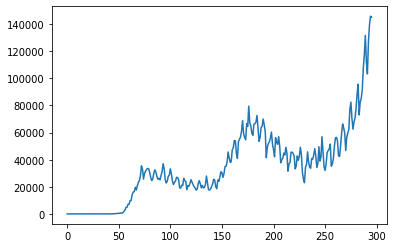

In [41]:
plt.plot(cases['day'], cases['total'])

### Confidence Intervals

### Prediction Path